<img src="./assets/used-devices.jpg">

<div style="text-align: center; font-size: 2rem; font-weight: 500;">Predicting the Pricing of Used Devices in the Market</div>
<div style="text-align: center; font-size: 1rem; font-weight: 500; margin: 0 0 1rem;">Linear Regression</div>
This machine learning project aims to predict the pricing of used devices in the market based on their intrinsic build components. Specifically, the model will estimates the pricing value of used devices based on features such as brand, model, condition, age, and other relevant attributes using a <b>Linear Regression</b> model. The goal of the model is to have accurate price predictions that reflect real-life market trends and device specifics. Historical data on device sales is used to train the model and evaluate its performance based on its ability to predict actual market prices.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import category_encoders as ce
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("./data/used_device_data.csv")
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


<div style="margin: 1.25rem 0;">‎ </div>

<h1 style="text-align: center;">Exploratory Data Analysis (EDA)</h1>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Structural Analysis of the Dataset</h3>
The given dataset contains 3454 records (samples) and 15 columns (variables). It is evident that certain columns such as 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', and 'weight' have <b>null value records</b>. These records will be subjected to imputation/row removal later in the process.

In [7]:
df.shape

(3454, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Statistical Analysis of the Dataset</h3>
To progress in the EDA, we need to analyze the different statistical values that correspond to the given dataset. In this case, here are the key points needed to be analyzed:

* **Standard Deviation**: Columns such as 'battery', 'weight', 'internal_memory', and 'days_used' have **high standard deviation values** indicating a large spread in the data distribution. These variables will be considered under value normalization to avoid further data bias and inconsistencies.

In [11]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white">Handling Null Values</h3>

A number of columns in the dataset contain null values especially the 'rear_camera_mp' yielding the highest null value count of 179. Therefore, the corresponding samples holding null values will be subjected to value imputation/row removal. Specifically, the columns holding null values are:

* rear_camera_mp
* front_camera_mp
* internal_memory
* ram
* battery
* weight

In [15]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Performing Value Imputation</h3>
For this notebook, I decided to perform value imputation instead of immediate record removal given that we would have to remove at most **179 records** which constitute **5%** of the total records in the dataset.

In [17]:
df.fillna({
    "rear_camera_mp": df["rear_camera_mp"].mean(),
    "front_camera_mp": df["front_camera_mp"].mean(),
    "internal_memory": df["internal_memory"].mean(),
    "ram": df["ram"].mean(),
    "battery": df["battery"].mean(),
    "weight": df["weight"].mean()
}, inplace=True)

In [18]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Univariate Analysis 📊</h2>
Given the high standard deviation values in the 'battery', 'weight', and 'days_used' column of the dataset, analyzing the <b>presence of outliers</b> should be done using visualization models such as the box plot. Here are the visualization of the data distribution of these columns as well as other columns that have low standard deviation for the sake of comparison. 

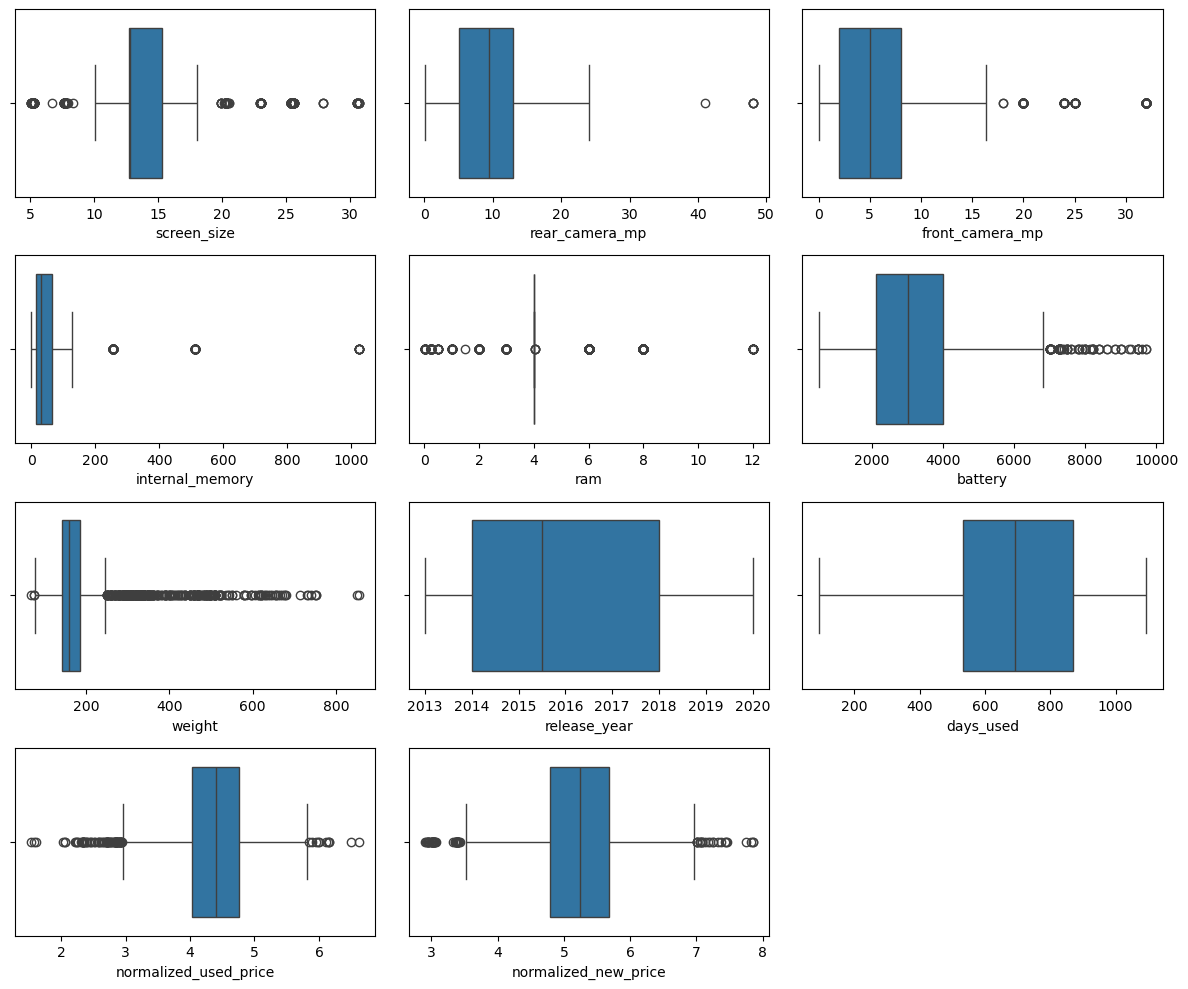

In [21]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
fig = plt.figure(figsize=(12,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

Based on the box plot visualizations, there are a lot of supposed "outliers" that exist outside of the mean value in each feature. HOWEVER, removing them might not be appropriate because of:

* **Domain Knowledge** - The samples existing in the dataset can refer to **any device** that is commercially sold in the market such as phones, tablets, laptops, etc. Given that we are analyzing varying types of devices that have their own intrinsic physical differences, outliers in features such as screen_size, weight, and battery might not be relevant.

In this case, removing these "outliers" might NOT be appropriate considering that we are analyzing various types of devices.

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Bivariate Analysis 📊</h2>

<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Quantitative Feature Analysis using Scatter Plot</h3>
It is also necessary to understand the direct correlation of each feature relative to the target variable. Based on the visualization results, most features somewhat follow a linear rate of change, but shape of the graph can also interpreted as a logarithmic curve. 
<br><br>
Evaluation: On another note, it is important to take note of the features, <b>release_year</b> and <b>days_used</b> as the pricing value does NOT show any significant changes as the value of the feature increases.

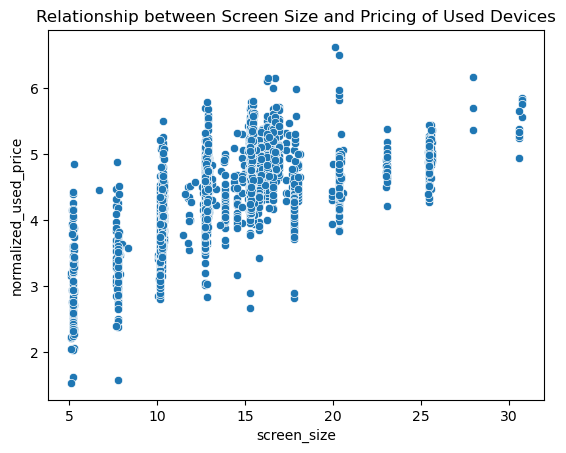

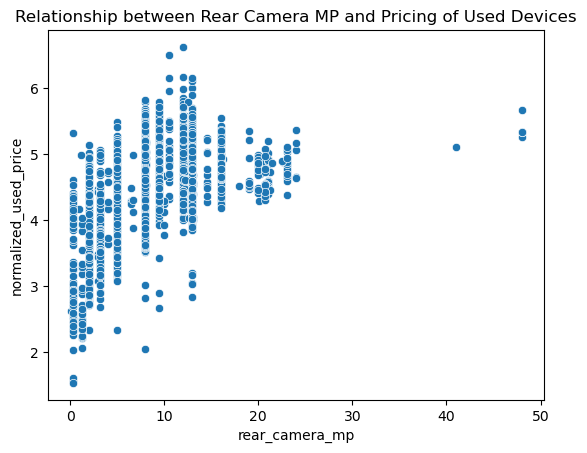

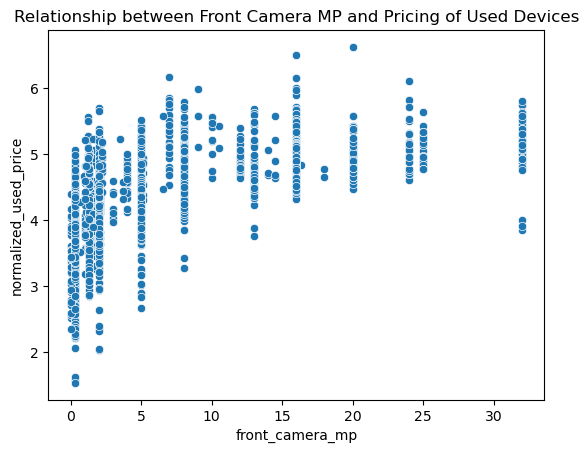

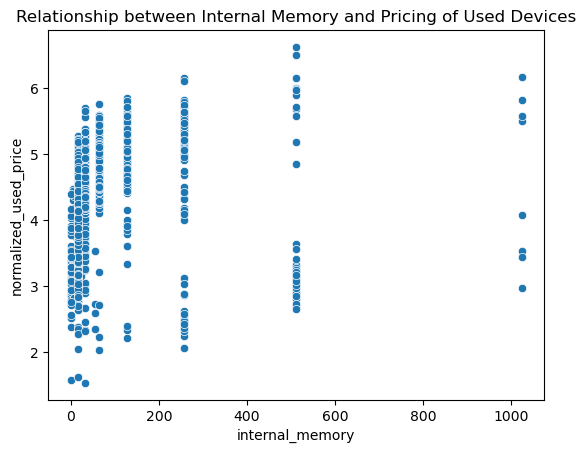

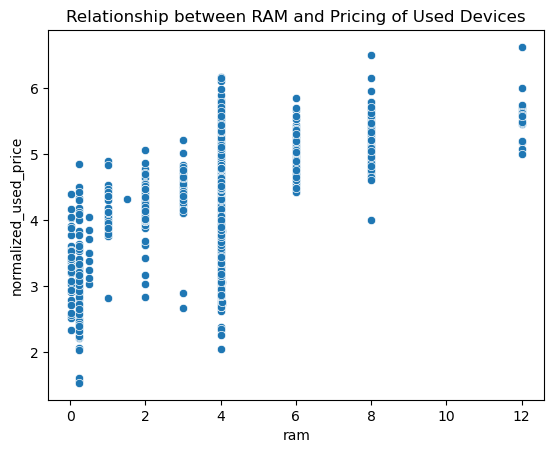

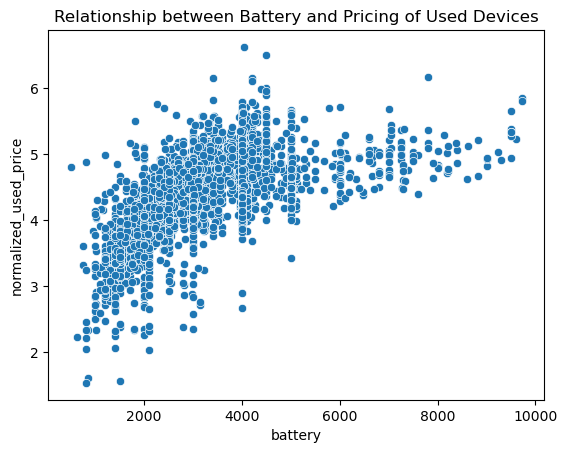

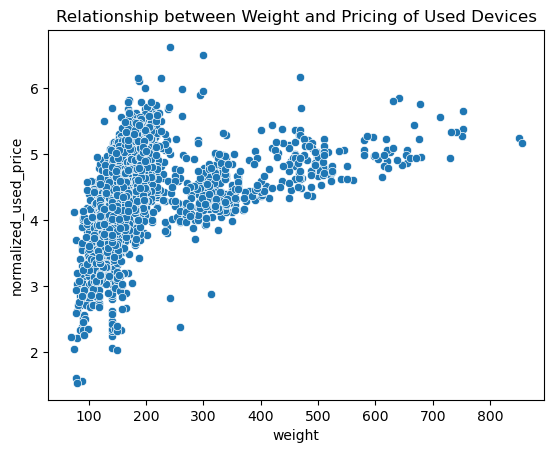

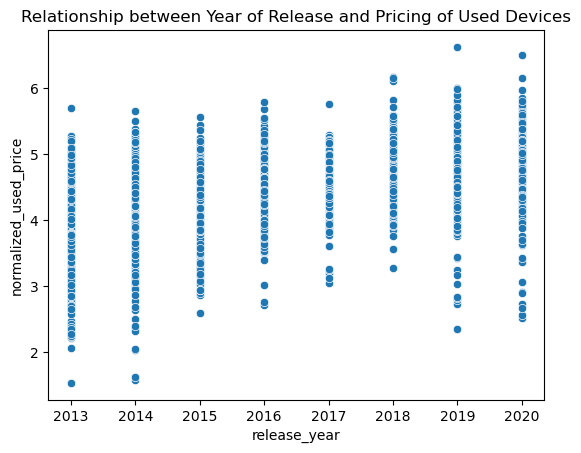

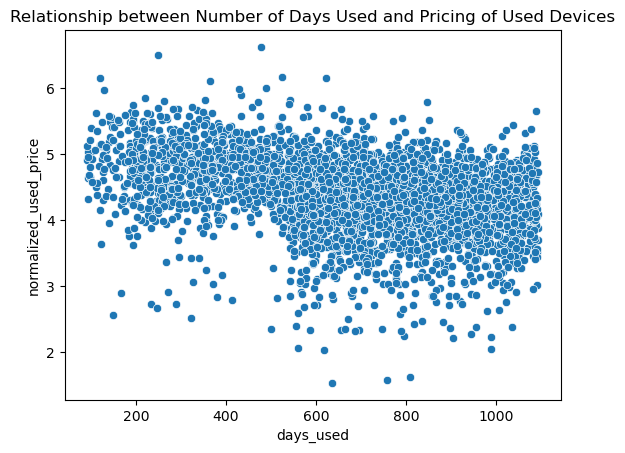

In [27]:
# SCREEN SIZE VS PRICING OF USED DEVICES
sns.scatterplot(x="screen_size", y="normalized_used_price", data=df)
plt.title("Relationship between Screen Size and Pricing of Used Devices")
plt.show()

# REAR CAMERA MP VS PRICING OF USED DEVICES
sns.scatterplot(x="rear_camera_mp", y="normalized_used_price", data=df)
plt.title("Relationship between Rear Camera MP and Pricing of Used Devices")
plt.show()

# FRONT CAMERA MP VS PRICING OF USED DEVICES
sns.scatterplot(x="front_camera_mp", y="normalized_used_price", data=df)
plt.title("Relationship between Front Camera MP and Pricing of Used Devices")
plt.show()

# INTERNAL MEMORY VS PRICING OF USED DEVICES
sns.scatterplot(x="internal_memory", y="normalized_used_price", data=df)
plt.title("Relationship between Internal Memory and Pricing of Used Devices")
plt.show()

# RAM VS PRICING OF USED DEVICES
sns.scatterplot(x="ram", y="normalized_used_price", data=df)
plt.title("Relationship between RAM and Pricing of Used Devices")
plt.show()

# BATTERY VS PRICING OF USED DEVICES
sns.scatterplot(x="battery", y="normalized_used_price", data=df)
plt.title("Relationship between Battery and Pricing of Used Devices")
plt.show()

# WEIGHT VS PRICING OF USED DEVICES
sns.scatterplot(x="weight", y="normalized_used_price", data=df)
plt.title("Relationship between Weight and Pricing of Used Devices")
plt.show()

# RELEASE YEAR VS PRICING OF USED DEVICES
sns.scatterplot(x="release_year", y="normalized_used_price", data=df)
plt.title("Relationship between Year of Release and Pricing of Used Devices")
plt.show()

# DAYS USED VS PRICING OF USED DEVICES
sns.scatterplot(x="days_used", y="normalized_used_price", data=df)
plt.title("Relationship between Number of Days Used and Pricing of Used Devices")
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Categorical Feature Analysis using ANOVA</h3>

#### 1. Device Brand

The results indicate a very strong relationship between the categorical feature and the continuous target variable:

* **F-Statistic** - The F-statistic of approximately **38.79** suggests that there is a substantial difference in the means of the target variable across the different categories of the feature. A higher F-statistic indicates that the variability between the group means is significantly greater than the variability within the groups.

* **P-Value** - The p-value is extremely small, far below the common significance threshold of 0.05. This strongly suggests rejecting the null hypothesis, indicating that at least one group mean is significantly different from the others.

In [31]:
groups = [df["normalized_used_price"][df["device_brand"] == category] for category in df["device_brand"].unique()]
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 38.79042408845584
P-Value: 3.697117760839948e-208


<div style="margin: 0.1rem 0;">‎ </div>

#### 2. OS

The results indicate a very strong relationship between the categorical feature and the continuous target variable:

* **F-Statistic** - The F-statistic of approximately **196.64** is exceptionally high, suggesting that the variability between the group means is significantly greater than the variability within the groups. This indicates a very strong effect of the categorical feature on the target variable.

* **P-Value** - The p-value is extremely low, much smaller than the typical significance threshold of 0.05. This provides strong evidence to reject the null hypothesis, indicating that at least one group mean is significantly different from the others.

In [34]:
groups = [df["normalized_used_price"][df["os"] == category] for category in df["os"].unique()]
f_stat, p_value = f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 196.63775204281703
P-Value: 1.0001282504638895e-117


<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Multivariate Analysis 📊</h2>
The heatmap visualization below indicates the cross mapping of variables in terms of the their corresponding degree of linear correlation using the Pearson correlation coefficient. In this case, we should only take a look at the <b>second to the last column</b> which indicates the correlation of each independent feature/variable to the target variable, normalized_used_price.<br><br>
We should take note of the columns that indicate <b>weak correlation</b> to which we should exclude in during the feature engineering phase. Namely, these features that show low correlation are:

* internal_memory
* days_used

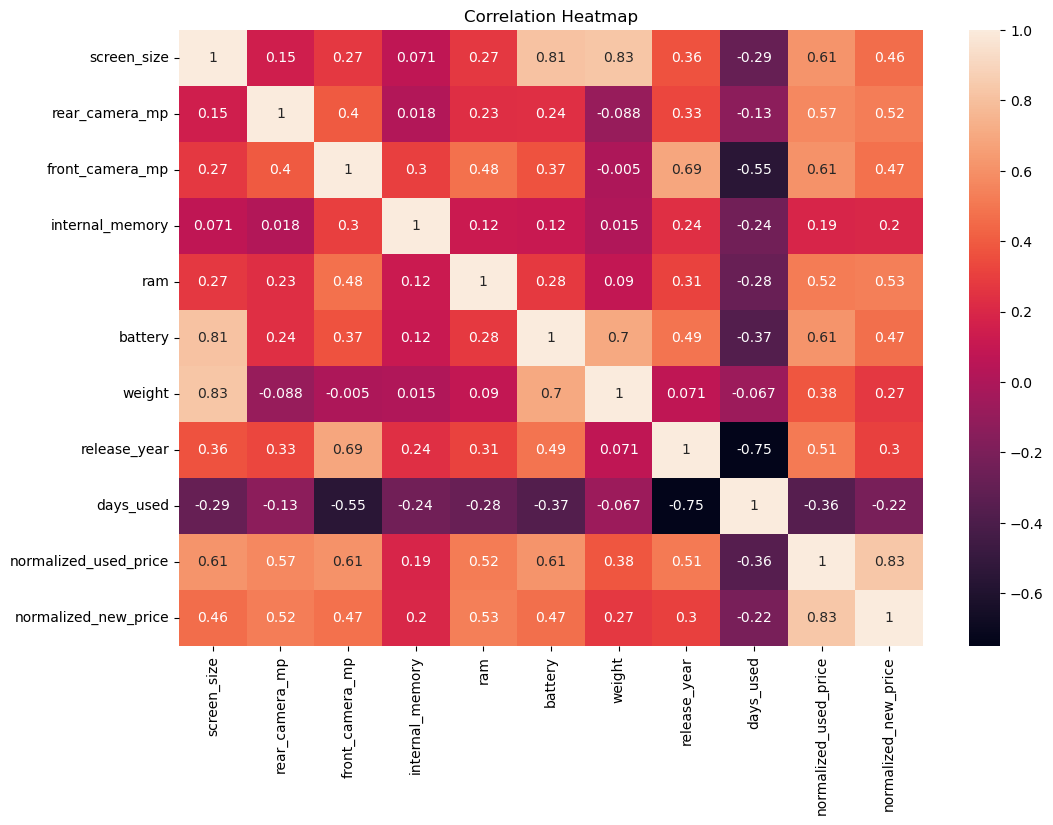

In [37]:
# Creating the correlation heatmap
quant_corr = df[["screen_size", "rear_camera_mp", "front_camera_mp", "internal_memory", 
                    "ram", "battery", "weight", "release_year", "days_used", 
                     "normalized_used_price", "normalized_new_price"]]
correlation_matrix = quant_corr.corr()

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

<div style="margin: 1.25rem 0;">‎ </div>

<div style="text-align: center; font-size: 2rem; font-weight: 500;">Feature Selection/Engineering</div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Principal Component Analysis (PCA)</h3>

In performing one-hot encoding for categorical features such as "device_brand" and "os", a lot of columns were created because of the number of unique categories especially in the "device_brand" feature. Specifically, "device_brand" especially has a great number of categories reaching **34** distinct categories/columns. In this case, it is important to perform **dimensionality reduction** because as the number of features (dimensions) increases, the amount of data needed to maintain the same performance grows exponentially.

In [41]:
# Show the total number of unique device brand categories
print(df["device_brand"].value_counts())
print(f"\nNumber of Device Brand Categories: {len(df["device_brand"].unique())}")

device_brand
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: count, dtype: int64

Number of Device Brand Categories: 34


In [42]:
# Split categorical features and numerical features into separate dataframe subsets
quant_features = ["screen_size", "rear_camera_mp", "front_camera_mp", "internal_memory", 
                         "ram", "battery", "weight", "release_year", "days_used", "normalized_used_price", 
                         "normalized_new_price"]
cat_features = [x for x in filter(lambda x: x not in quant_features, df.columns)]

quant_df = df[quant_features]
cat_df = df[cat_features]
cat_df

,device_brand,os,4g,5g
0,Honor,Android,yes,no
1,Honor,Android,yes,yes
2,Honor,Android,yes,yes
3,Honor,Android,yes,yes
4,Honor,Android,yes,no
...,...,...,...,...
3449,Asus,Android,yes,no
3450,Asus,Android,yes,no
3451,Alcatel,Android,yes,no
3452,Alcatel,Android,yes,no


<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Performing One-Hot Encoding</h3>

In [44]:
brand_encoder = OneHotEncoder(drop="first", sparse_output=False)
brand_encoded = brand_encoder.fit_transform(cat_df[["device_brand"]])
brand_encoded_df = pd.DataFrame(brand_encoded, columns=brand_encoder.get_feature_names_out(["device_brand"]))
brand_encoded_df

,device_brand_Alcatel,device_brand_Apple,device_brand_Asus,device_brand_BlackBerry,device_brand_Celkon,device_brand_Coolpad,device_brand_Gionee,device_brand_Google,device_brand_HTC,device_brand_Honor,...,device_brand_Others,device_brand_Panasonic,device_brand_Realme,device_brand_Samsung,device_brand_Sony,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3451,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3452,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
os_encoder = OneHotEncoder(drop="first", sparse_output=False)
os_encoded = os_encoder.fit_transform(cat_df[["os"]])
os_encoded_df = pd.DataFrame(os_encoded, columns=os_encoder.get_feature_names_out(["os"]))
os_encoded_df

,os_Others,os_Windows,os_iOS
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
3449,0.0,0.0,0.0
3450,0.0,0.0,0.0
3451,0.0,0.0,0.0
3452,0.0,0.0,0.0


<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Performing Binary Encoding</h3>

In [47]:
signal_encoder = ce.BinaryEncoder(cols=["4g", "5g"])
signal_encoded = signal_encoder.fit_transform(cat_df[["4g", "5g"]])
signal_encoded

,4g_0,4g_1,5g_0,5g_1
0,0,1,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,0,1
...,...,...,...,...
3449,0,1,0,1
3450,0,1,0,1
3451,0,1,0,1
3452,0,1,0,1


<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> One-Hot Encoded Feature Scaling</h3>

In [49]:
num_df_cols = ["screen_size", "rear_camera_mp", "front_camera_mp", "ram", "battery", "weight", "release_year", "normalized_new_price"]

# Include highly correlated numerical features in the scaling and PCA
pca_df = pd.concat([df[["normalized_new_price"]], pd.DataFrame(brand_encoded)], axis=1)
num_df = df[num_df_cols]

# Standardize the one-hot encoded data
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)

# Combine one-hot-encoded categorical feature with numerical features
combined_data = np.hstack((num_scaled, brand_encoded))

<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Performing PCA</h3>
In performing the PCA, it is important to alos include numerical features that have **high correlation** to the target variable along with the one-hot encoded categorical feature. Namely these highly correlated features are:

In [51]:
# Apply PCA to the one-hot encoded categorical features
pca = PCA(n_components=2)
brand_reduced = pca.fit_transform(combined_data)
brand_pca_df = pd.DataFrame(brand_reduced, columns=["device_brand_pc1", "device_brand_pc2"])
brand_pca_df

,device_brand_pc1,device_brand_pc2
0,0.133677,-0.532696
1,3.205923,-1.228714
2,2.909402,-0.950205
3,5.202741,2.758774
4,1.302852,0.006013
...,...,...
3449,2.506988,-0.431338
3450,2.538652,-1.068332
3451,0.539053,-0.006134
3452,0.356558,0.119359


In [52]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")

Explained variance by PC1: 0.41
Explained variance by PC2: 0.20


<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Engineering</h3>

### Performing Log Transformation
In order to reduce the bias caused by the skewing of the data distribution through outliers, we can perform log transformation.

In [56]:
df["weight"] = np.log(df["weight"] + 1)
df["screen_size"] = np.log(df["screen_size"] + 1)
df["battery"] = np.log(df["battery"] + 1)

<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Selection</h3>

Using insights gathered from the analysis of variables in the EDA, we can now select the appropriate variables that have decent correlation to the target variable. Specifically, these are:

In [59]:
quant_corr_df = df.drop(columns=["device_brand", "os", "4g", "5g", "internal_memory", "days_used", "normalized_used_price"])

X = pd.concat([quant_corr_df, brand_pca_df, os_encoded_df, signal_encoded], axis=1)
y = df["normalized_used_price"]
X

,screen_size,rear_camera_mp,front_camera_mp,ram,battery,weight,release_year,normalized_new_price,device_brand_pc1,device_brand_pc2,os_Others,os_Windows,os_iOS,4g_0,4g_1,5g_0,5g_1
0,2.740840,13.000000,5.0,3.0,8.013343,4.990433,2020,4.715100,0.133677,-0.532696,0.0,0.0,0.0,0,1,0,1
1,2.906901,13.000000,16.0,8.0,8.366603,5.365976,2020,5.519018,3.205923,-1.228714,0.0,0.0,0.0,0,1,1,0
2,2.873000,13.000000,8.0,8.0,8.343078,5.365976,2020,5.884631,2.909402,-0.950205,0.0,0.0,0.0,0,1,1,0
3,3.277145,13.000000,8.0,6.0,8.888895,6.175867,2020,5.630961,5.202741,2.758774,0.0,0.0,0.0,0,1,1,0
4,2.792391,13.000000,8.0,3.0,8.517393,5.225747,2020,4.947837,1.302852,0.006013,0.0,0.0,0.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,2.793616,9.460208,8.0,6.0,8.517393,5.252273,2019,6.483872,2.506988,-0.431338,0.0,0.0,0.0,0,1,0,1
3450,2.787477,13.000000,8.0,8.0,8.294300,5.303305,2018,6.251538,2.538652,-1.068332,0.0,0.0,0.0,0,1,0,1
3451,2.821379,13.000000,5.0,3.0,8.294300,5.111988,2020,4.528829,0.539053,-0.006134,0.0,0.0,0.0,0,1,0,1
3452,2.821379,13.000000,5.0,2.0,8.294300,5.081404,2020,4.624188,0.356558,0.119359,0.0,0.0,0.0,0,1,0,1


<div style="margin: 0.1rem 0;">‎ </div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Scaling</h3>
It is also important to scale the datapoint values of each feature in this case because of their varying value ranges. Please refer to df.describe() listed previously to see the corresponding statistics of the dataset.

In [62]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<div style="margin: 1.25rem 0;">‎ </div>

<div style="text-align: center; font-size: 2rem; font-weight: 500;">Model Training (Linear Regression)</div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Splitting the Data</h3>

In [66]:
# Standard training/testing split: 80% training data - 20% testing data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Building the Linear Regression Model</h3>

In [68]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

<div style="margin: 1.25rem 0;">‎ </div>

<div style="text-align: center; font-size: 2rem; font-weight: 500;">Model Evaluation</div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Comparison of Actual Values and Predicted Values</h3>

In [72]:
test_df = pd.DataFrame(y_test.values)
pred_df = pd.DataFrame(y_pred)

test_pred_df = pd.concat([test_df, pred_df], axis=1, ignore_index=True)
test_pred_df.columns = ["y_test", "y_pred"]
test_pred_df

,y_test,y_pred
0,3.974246,3.951172
1,5.001191,4.939453
2,4.562054,4.292969
3,4.176232,4.151367
4,3.156149,3.719727
...,...,...
686,4.309322,3.622070
687,4.378144,4.072266
688,4.411828,4.324219
689,3.764451,3.596680


The DataFrame displayed above shows the comparison between the actual data and predicted data of the linear regresion model. It shows that in most data mapping instances, the model was able to **closely predict** the actual value of the target variable.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Evaluation</h3>

In [75]:
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)

print(f"MSE value: {linear_mse}")
print(f"RMSE value: {linear_rmse}")

linear_r2 = r2_score(y_test,y_pred)
print(f"R2 Score value: {linear_r2}")

MSE value: 0.05060369026625689
RMSE value: 0.22495264005176044
R2 Score value: 0.8440653095791861


<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Fit Visualization</h3>

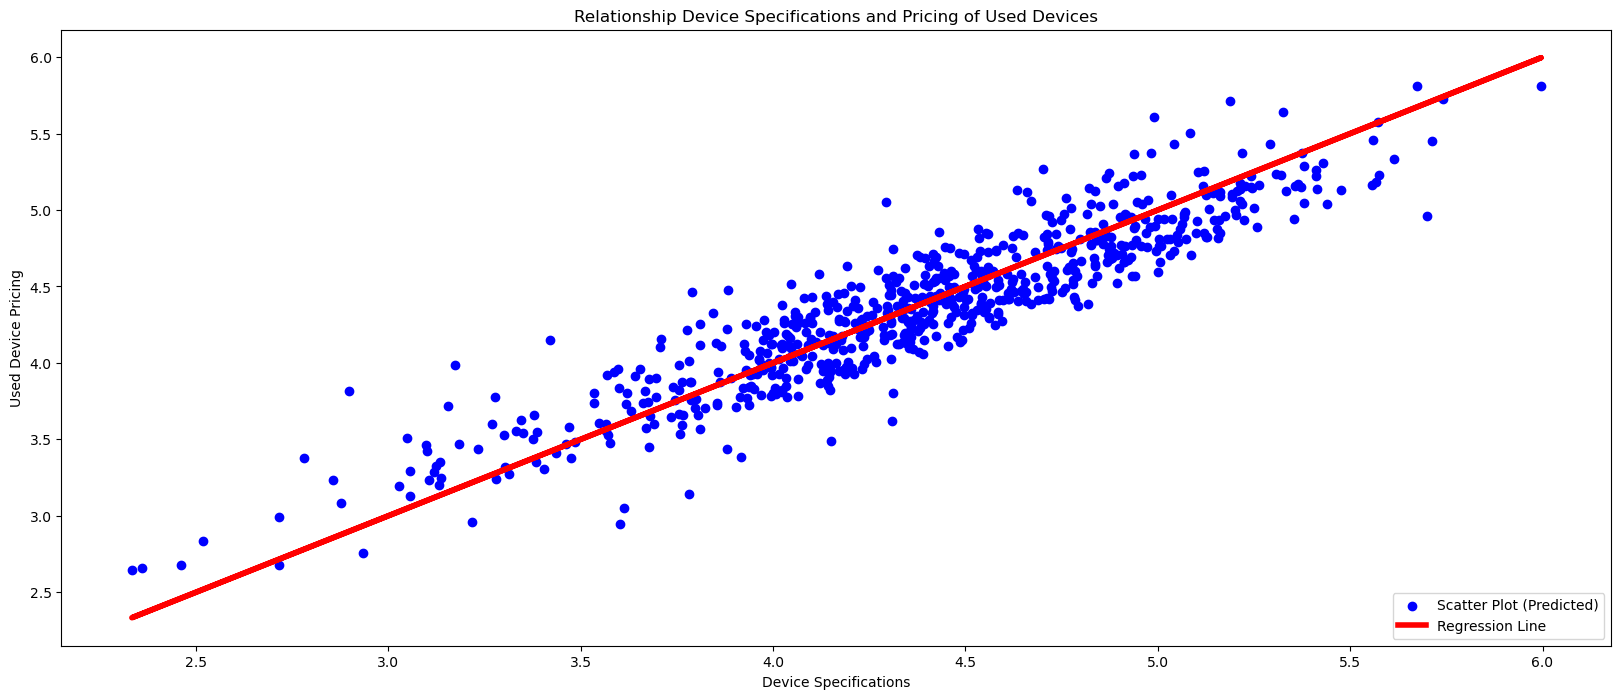

In [77]:
plt.figure(figsize=(20,8))
plt.scatter(y_test,y_pred,color="blue",label="Scatter Plot (Predicted)")
plt.plot(y_test,y_test,color="red",linewidth=4,label="Regression Line")

plt.legend(loc=4)
plt.title("Relationship Device Specifications and Pricing of Used Devices")
plt.xlabel("Device Specifications")
plt.ylabel("Used Device Pricing")

plt.show()

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Checking for Overfitting and Underfitting</h3>

In [79]:
print(f"Training set score: {linear_reg.score(X_train,y_train)}")
print(f"Testing set score: {linear_reg.score(X_test,y_test)}")

Training set score: 0.8469405883552348
Testing set score: 0.8440653095791861


<div style="margin: 1.25rem 0;">‎ </div>

<div style="text-align: center; font-size: 2rem; font-weight: 500;">Results and Recommendations</div>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Fit Evaluation(MSE, RMSE, R2)</h3>

* **Mean Squared Error (MSE): 0.0507**<br>
The MSE value indicates the average squared difference between the predicted and actual values. A lower MSE suggests better model performance, as it reflects less error in predictions. In this case, an MSE of 0.0507 indicates that, on average, the squared deviations from the true values are relatively small.

* **Root Mean Squared Error (RMSE): 0.2253**<br>
The RMSE is the square root of the MSE and provides an error metric in the same units as the target variable. An RMSE of 0.2253 suggests that, on average, the model's predictions deviate from the actual values by approximately 0.2253 units. This value can be interpreted in the context of the target variable's scale to assess how significant this error is.

* **R-squared Score (R²): 0.8436**<br>
The R² score indicates the proportion of variance in the target variable that is explained by the model. An R² value of 0.8436 means that approximately 84.36% of the variance in the target variable can be explained by the model. This is a strong indication of model performance, suggesting that the model captures a significant amount of the variability in the data.

Overall, the model demonstrates strong predictive capabilities, with a low MSE and RMSE indicating minimal prediction error and a high R² score signifying effective variance explanation. These results suggest that the model is well-fitted to the data, making it suitable for practical applications. Further validation or comparison with other models could enhance the assessment of its effectiveness.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Score</h3>

* **Training Set Score = 0.8468**<br>
The training set score indicates that the model explains approximately 84.68% of the variance in the training dataset. This high score suggests that the model has effectively learned the relationships between the features and the target variable within the training data.

* **Testing Set Score = 0.8436**<br>
The testing set score shows that the model explains about 84.36% of the variance in the unseen testing dataset. This score is slightly lower than the training score, which is common and indicates that the model generalizes well to new data.

* **Comparison of Scores**<br>
The difference of approximately 0.0032 (or 0.32%) between the training and testing scores suggests minimal overfitting. The close proximity of these scores indicates that the model is not excessively tailored to the training data and retains its predictive performance on unseen data.

Overall, both scores indicate strong predictive performance, with the model successfully capturing a large portion of the variance in both the training and testing datasets. The small difference between the two scores suggests a good level of generalization, making the model suitable for deployment or further analysis. Further validation through techniques like cross-validation or additional performance metrics could provide a more comprehensive assessment of its effectiveness.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Fit Evaluation</h3>

* **Explained Variance by PC1: 0.41**<br>
The first principal component (PC1) explains 41% of the total variance in the dataset. This indicates that PC1 captures a significant portion of the information and variability present in the original data. A value of 0.41 suggests that PC1 is a strong summarization of the underlying structure of the data.

* **Explained Variance by PC2: 0.20**<br>
The second principal component (PC2) accounts for 20% of the total variance. Together with PC1, the first two components explain 61% of the total variance in the dataset. This indicates that a substantial amount of the variability is captured by just these two components, which can be beneficial for dimensionality reduction while retaining important information.

* **Cumulative Explained Variance**<br>
With PC1 and PC2 combined explaining 61% of the variance, this level of explained variance is typically considered sufficient for many applications, particularly when aiming for a balance between simplicity and interpretability in the data representation.

Overall, the results indicate that the principal components effectively capture a significant portion of the variance in the dataset. This suggests that dimensionality reduction using these components could be useful for further analysis or modeling, as it retains a meaningful amount of information from the original feature set. Further exploration of additional components may provide additional insights, but the first two components already summarize a considerable amount of the data's variability.